#                                    # CREDITCARD FRAUD PREDICITION

# Problam Staetment


According to the Data Set has more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.the Digital payments are evolving, but so are cyber criminals. we experiment with the creditcard fraud dataset to explore the machine learning algorithms and build an optimum model to predict the fraud.


# data Definition

Feature Explanation:

Each attribute is a bank risk factor.

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

# Tabel of Content

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [87]:
plt.rcParams["figure.figsize"]=[12,8]

# 2.Read data

In [19]:
df=pd.read_csv(r"C:\PGA 09 Data Analysis\Meachine Learning\My Project\card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0


Dimensions of the data

In [20]:
df.shape

(1000000, 8)

# 3.Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data before building predictive models.

Here, we analyze and prepare data to perform classification techniques:
1. Check data types. Ensure your data types are correct. Refer data definitions to validate
2. If data types are not as per business definition, change the data types as per requirement
3. Check for missing values
4. Study summary statistics
5. Distribution of variable
5. Study correlation



# 3.1 Understand the Dataset

3.2.Check for data type

In [21]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                     int64
used_chip                           int64
used_pin_number                     int64
online_order                        int64
fraud                               int64
dtype: object

In our dataset, we have only Numerical variables

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int64  
 4   used_chip                       1000000 non-null  int64  
 5   used_pin_number                 1000000 non-null  int64  
 6   online_order                    1000000 non-null  int64  
 7   fraud                           1000000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 61.0 MB


3.3 check missing values

In [23]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

3.4 Summary Statistics

In [24]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723670,11851.104560,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


# 3.5.Distribution of Variable

  Distribution Variable using Visulization 

Percentage of fraud is:8.7403%


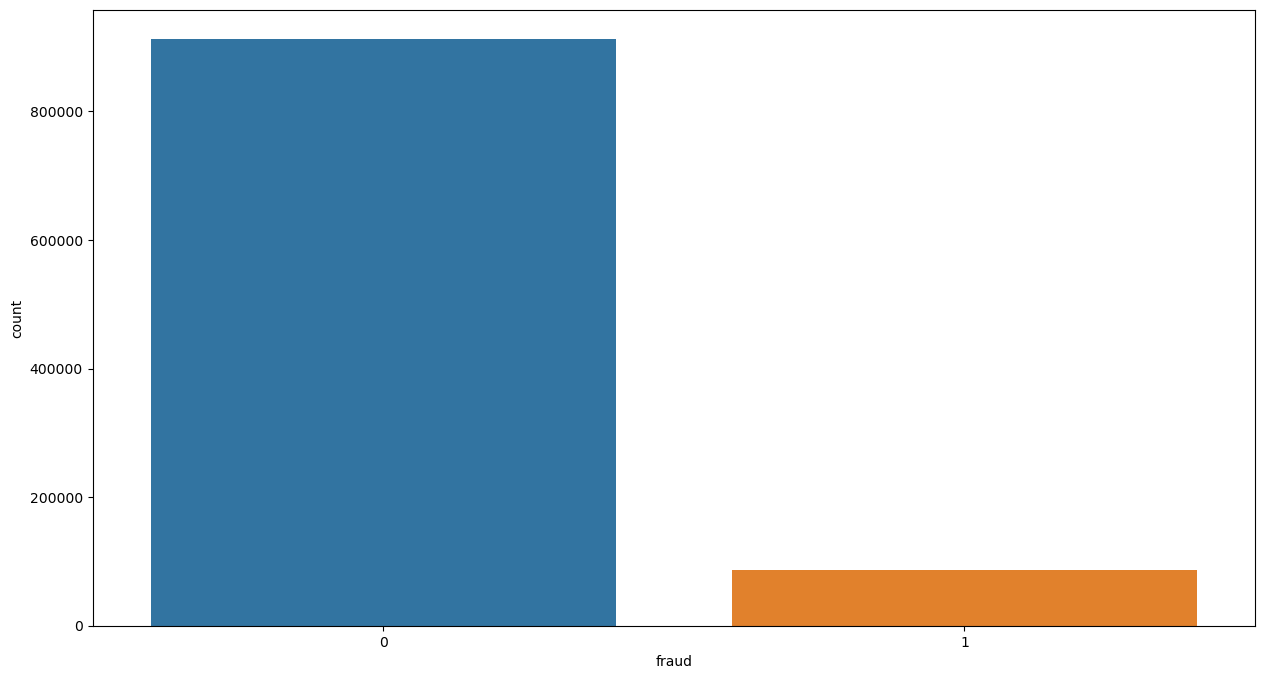

In [25]:
#use countplot to find the percentage of fraud in goiven data
print("Percentage of fraud is:{}%".format(100*df[df["fraud"]==1].shape[0]/df.shape[0]))
sns.countplot(x="fraud",data=df)
#display the plot
plt.show()

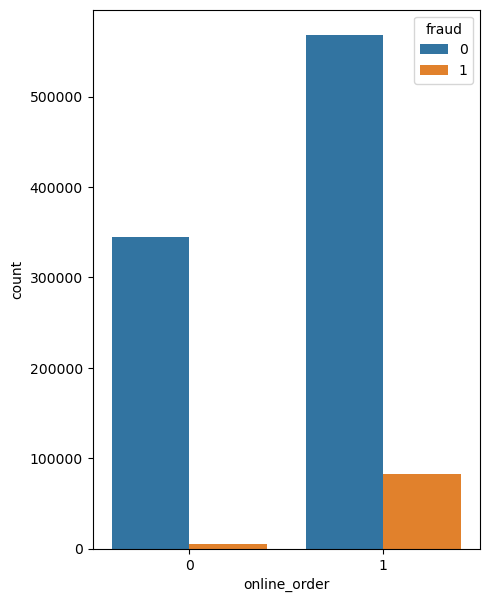

In [26]:
#use countsplot to find the fraud data by online order
sns.countplot(x="online_order",data=df, hue="fraud")
#fix the plot size
plt.rcParams["figure.figsize"]=[7,3]
#display the plot
plt.show()

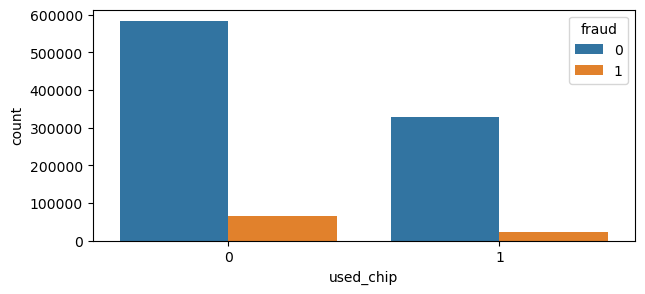

In [27]:
#use countsplot to find the fraud data by using Chip(creditcard)
sns.countplot(x="used_chip",data=df,hue="fraud")

#fis the plot size
plt.rcParams["figure.figsize"]=[8,5]

#display the Plot
plt.show()

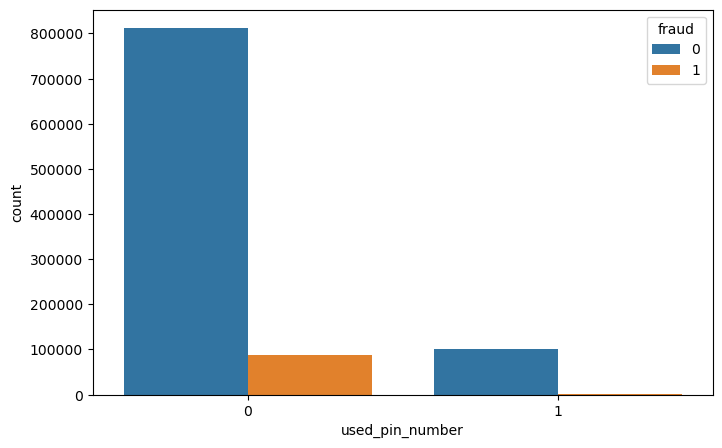

In [28]:
#use countsplot to find the fraud data by used pin number
sns.countplot(x="used_pin_number",data=df,hue="fraud")
#fix the plot size
plt.rcParams["figure.figsize"]=[5,2]
#display the output
plt.show()

3.6 Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near 1 indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

In [31]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


3.7 HeatMap

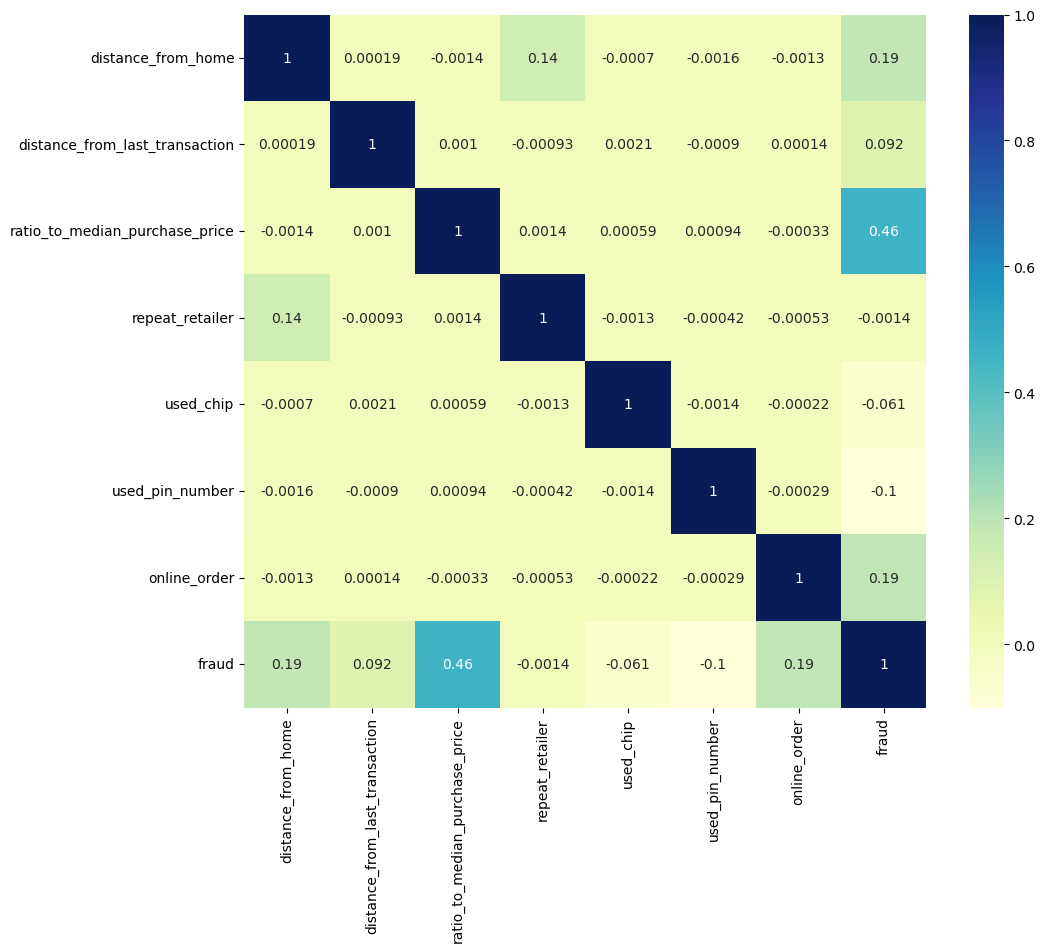

In [32]:
plt.figure(figsize=(11,9))
sns.heatmap(df .corr(),annot=True,cmap="YlGnBu")
plt.show()

In [33]:
corr=df.corr()

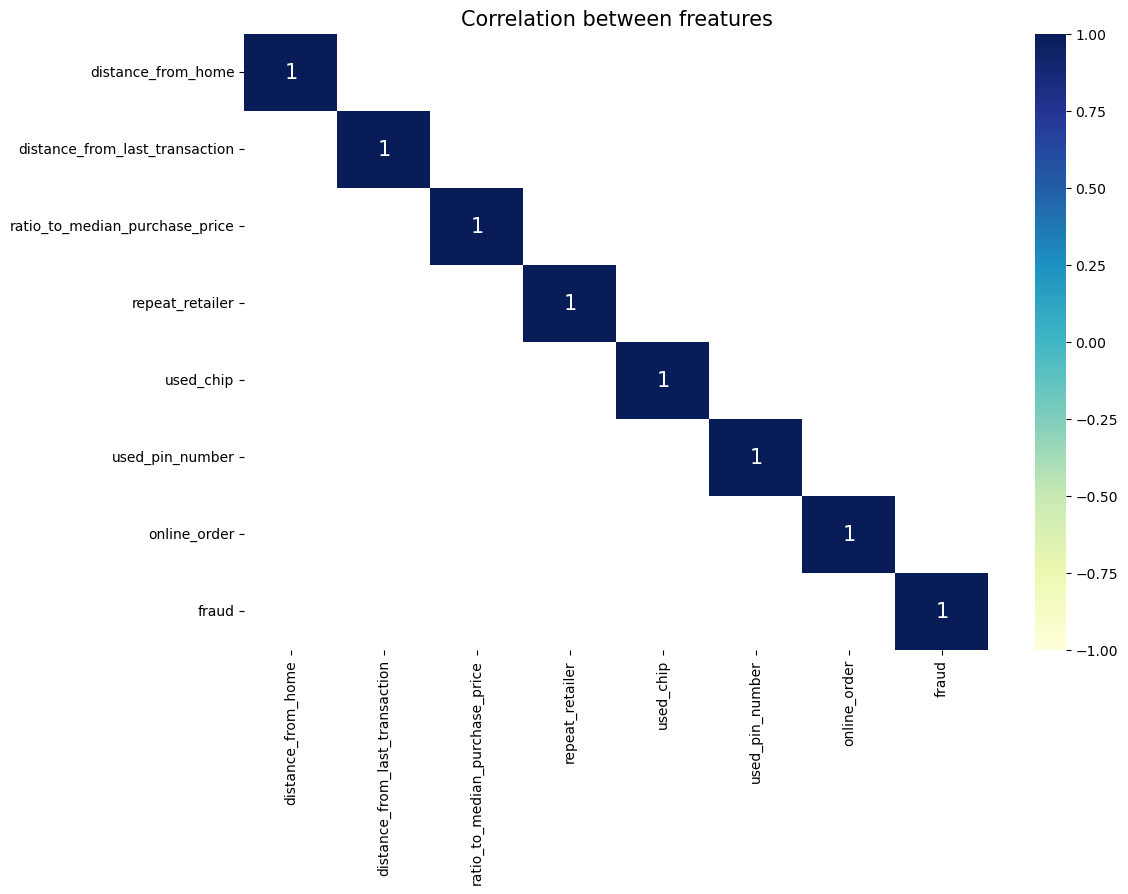

In [34]:
# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
plt.figure(figsize=(12,8))
sns.heatmap(corr[(corr >= 0.8) | (corr <= -0.9)],
           cmap="YlGnBu",vmax=1.0, vmin=-1.0,
           annot=True,annot_kws={"size":15})
plt.title("Correlation between freatures", fontsize=15)
# display the plot
plt.show()

# 4.Prepare the Data

In [35]:
# import various functions to perform classification

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [36]:
#set the target variable
X=df.drop(columns=["fraud"])
y=df["fraud"]

User defind Function

In [37]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

In [38]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

In [39]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm=confusion_matrix(y_test, y_pred)
    
    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix=pd.DataFrame(data=cm,columns=["Predicted:0","Predicted:1"],
                            index=["Actual:0","Actual:1"])
    
    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot=True,fmt="d",cmap=ListedColormap(["lightskyblue"]),
               cbar=False,linewidths=0.1,annot_kws={"size":25})
    
    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize=20)
    
    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize=20)
    
    # display the plot
    plt.show()

In [40]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr,tpr,_=roc_curve(y_test,y_pred_prob)
    
    # plot the ROC curve
    plt.plot(fpr,tpr)
    
    # set limits for x and y axes
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    
    # plot the straight line showing worst prediction for the model
    plt.plot([0,1],[0,1],"r--")
    
    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title("ROC Curve for credit card fraud classifier",fontsize=15)
    plt.title("False positive rate(1-Specificity)",fontsize=15)
    plt.title("True positive rate(Sensitivity)",fontsize=15)
    
    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x=0.02,y=0.9,s=("Auc Score:",round(roc_auc_score(y_test,y_pred_prob),4)))
    
    # plot the grid
    plt.grid(True)

In [41]:
# create an empty dataframe to store the scores for various classification algorithms
score_card=pd.DataFrame(columns=["Model","AUC score","Precision Score","Recall Score",
                                "Accuracy Score","Kappa Score","f1 Score"])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card
    
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card=score_card.append({"Model" : model_name,
                                   "AUC score" : roc_auc_score(y_test, y_pred_prob),
                                   "Precision Score" : metrics.precision_score(y_test, y_pred),
                                   "Recall Score" : metrics.recall_score(y_test, y_pred),
                                   "Accuracy Score" : metrics.accuracy_score(y_test, y_pred),
                                   "Kappa Score" : cohen_kappa_score(y_test, y_pred),
                                   "f1 Score": metrics.f1_score(y_test, y_pred)},
                                   ignore_index=True)
    return(score_card)

In [42]:
X.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1


In [43]:
X.head()

0    0
1    0
2    0
3    0
4    0
Name: fraud, dtype: int64

# 5.Model Building

Here we using the classification models are Logistic Regression, Decision Tree, AdaBoostClassifier, GuassianNB amd KNeihborsClassifier  we build the models and tabulate the models using dataframe and find the which is the best model

5.1 Split the Data

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=10)
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (600000, 7)
y_train (600000,)
X_test (400000, 7)
y_test (400000,)


5.2 LogisticRegression Model

In [45]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred=log_reg.predict(X_test)

In [47]:
y_pred_prob=log_reg.predict_proba(X_test)[:,1]
y_pred_prob

array([6.12925818e-05, 2.36202145e-02, 3.97087351e-02, ...,
       1.56049300e-02, 2.11503222e-02, 2.85904451e-04])

In [48]:
test_report=get_test_report(log_reg)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    365173
           1       0.89      0.61      0.72     34827

    accuracy                           0.96    400000
   macro avg       0.93      0.80      0.85    400000
weighted avg       0.96      0.96      0.96    400000



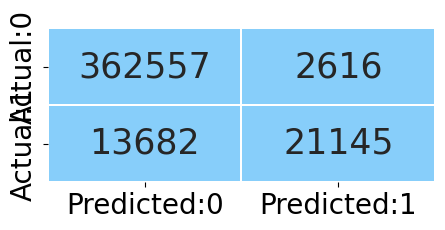

In [49]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plot_confusion_matrix(log_reg)
plt.rcParams["figure.figsize"]=[5,3]

In [50]:
kappa_value=kappa_score(log_reg)
print(kappa_value)

0.7006816018672887


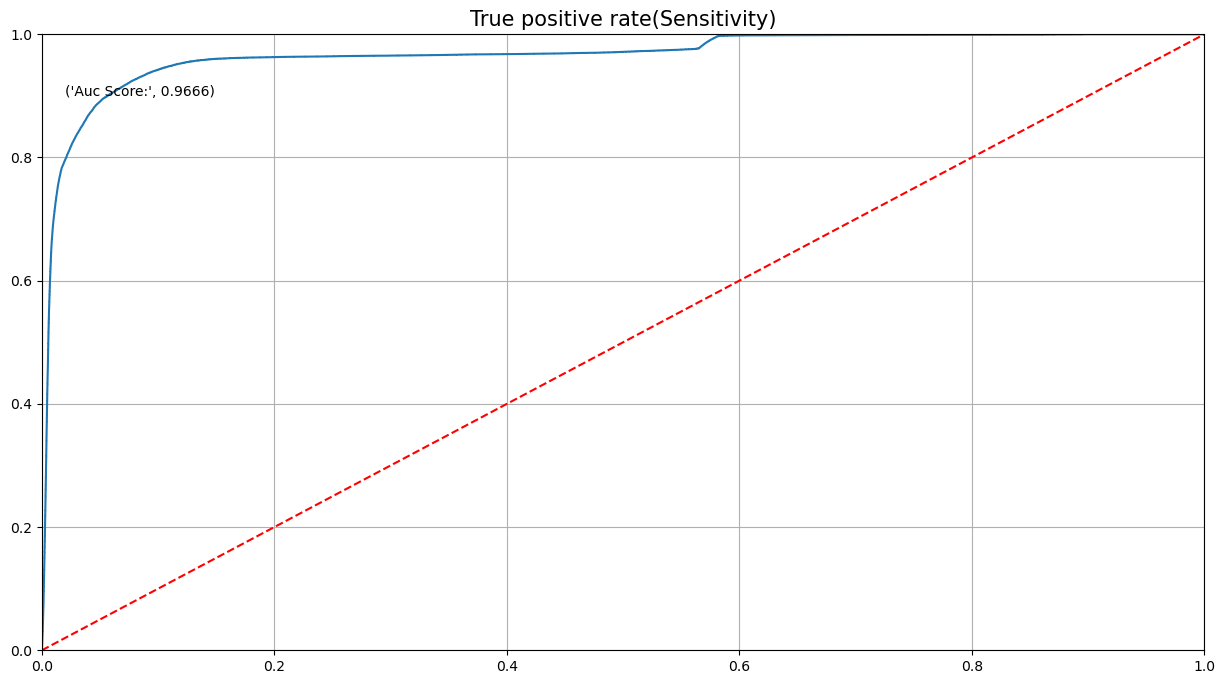

In [51]:
plt.figure(figsize=(15,8))
plot_roc(log_reg)

In [52]:
#Tabulate
update_score_card(model_name="Logistic Regression")

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,Logistic Regression,0.966621,0.889904,0.607144,0.959255,0.700682,0.72182


5.3 Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [54]:
decision_tree=DecisionTreeClassifier(criterion="entropy",random_state=10)
decision_tree_model=decision_tree.fit(X_train,y_train)

In [55]:
y_pred=decision_tree_model.predict(X_test)

In [56]:
y_pred_prob=decision_tree_model.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
test_report=get_test_report(decision_tree_model)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    365173
           1       1.00      1.00      1.00     34827

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



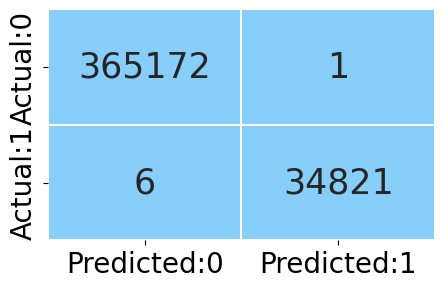

In [58]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plot_confusion_matrix(decision_tree_model)
plt.rcParams["figure.figsize"]=[5,3]

In [59]:
kappa_value=kappa_score(decision_tree_model)
print(kappa_value)

0.999889911611815


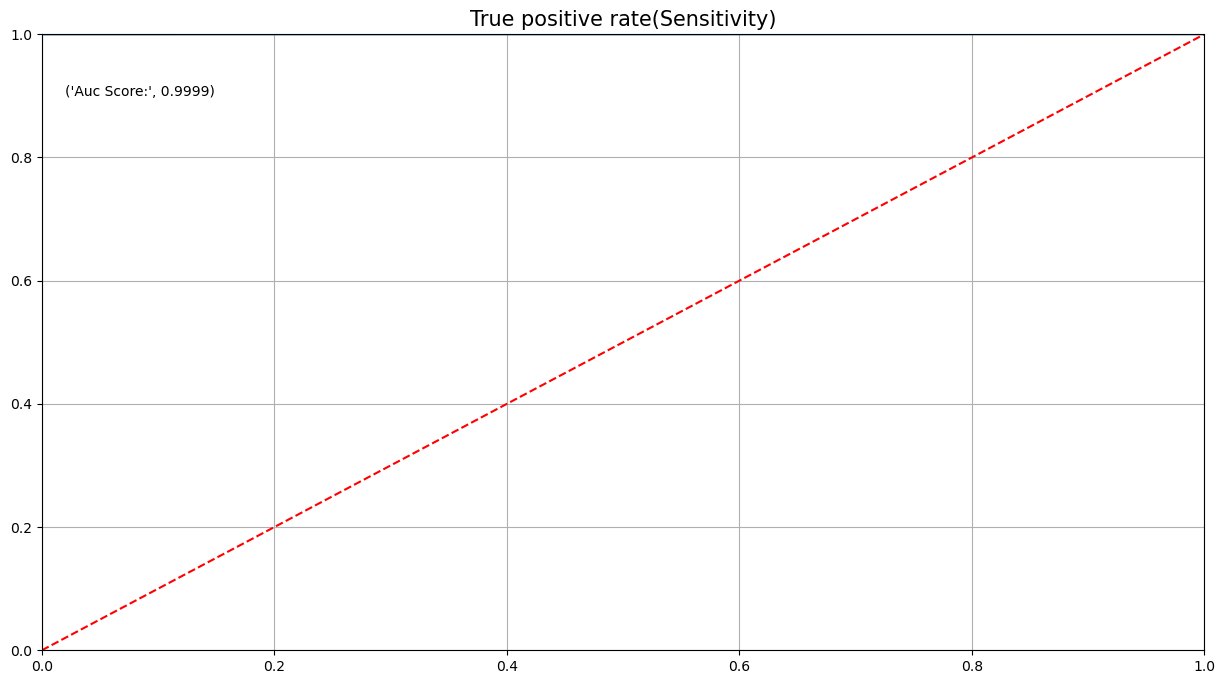

In [60]:
plt.figure(figsize=(15,8))
plot_roc(decision_tree_model)

In [61]:
#Tabulate
update_score_card(model_name="Decision_tree_model")

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,Logistic Regression,0.966621,0.889904,0.607144,0.959255,0.700682,0.721820
1,Decision_tree_model,0.999912,0.999971,0.999828,0.999982,0.999890,0.999899


5.4 Ensemle learning using AdaBoostClassifier

In [62]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [63]:
y_pred=adaboost.predict(X_test)

In [64]:
y_pred_prob=adaboost.predict_proba(X_test)[:,1]
y_pred_prob

array([0.37220989, 0.44010872, 0.41098429, ..., 0.44010872, 0.44010872,
       0.37220989])

In [65]:
test_report=get_test_report(adaboost)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    365173
           1       1.00      1.00      1.00     34827

    accuracy                           1.00    400000
   macro avg       1.00      1.00      1.00    400000
weighted avg       1.00      1.00      1.00    400000



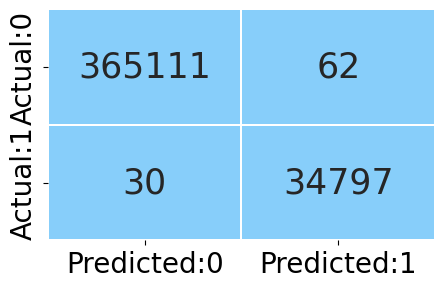

In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plot_confusion_matrix(adaboost)
plt.rcParams["figure.figsize"]=[7,3]

In [67]:
kappa_value=kappa_score(adaboost)
print(kappa_value)

0.9985538190283496


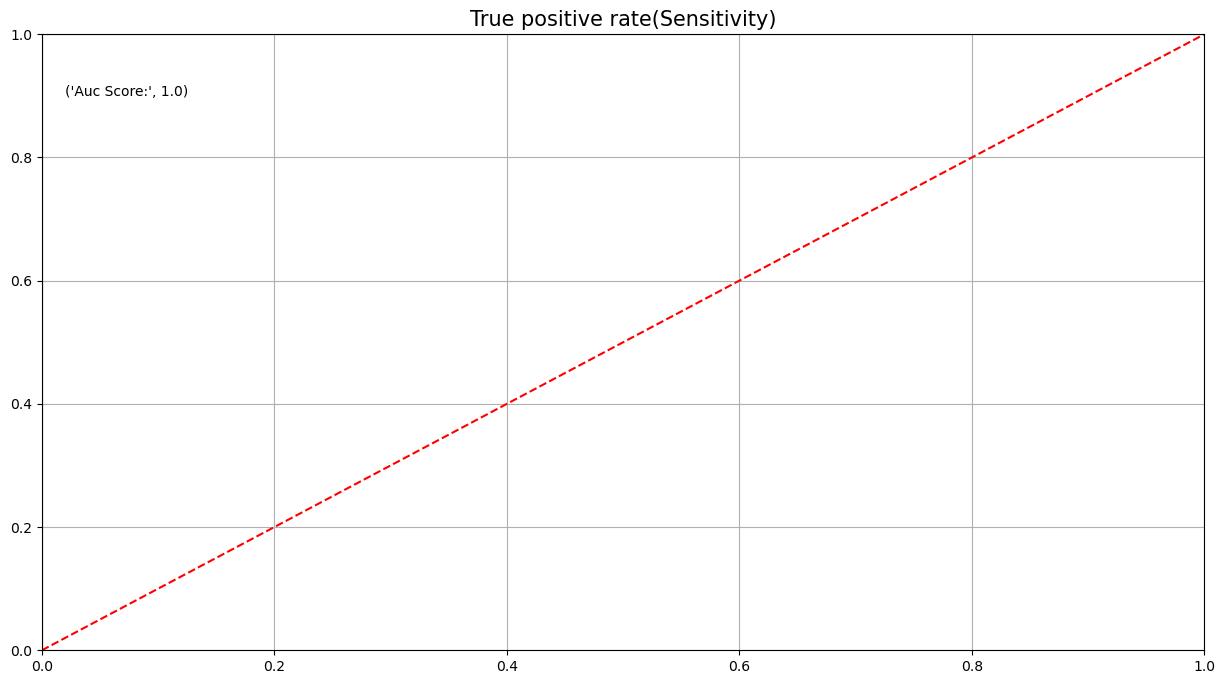

In [68]:
plt.figure(figsize=(15,8))
plot_roc(adaboost)

In [69]:
#Tabulate
update_score_card(model_name="AdaBoostClassifier")

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,Logistic Regression,0.966621,0.889904,0.607144,0.959255,0.700682,0.721820
1,Decision_tree_model,0.999912,0.999971,0.999828,0.999982,0.999890,0.999899
2,AdaBoostClassifier,0.999995,0.998221,0.999139,0.999770,0.998554,0.998680


5.6 NaiveBayes GuassianNB

In [70]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [71]:
y_pred=nb.predict(X_test)

In [72]:
y_pred_prob=nb.predict_proba(X_test)[:,1]
y_pred_prob

array([2.67030281e-05, 7.95886324e-02, 4.93291564e-02, ...,
       8.27110490e-02, 8.09179025e-02, 4.91587258e-05])

In [73]:
test_report=get_test_report(nb)
print(test_report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    365173
           1       0.79      0.59      0.68     34827

    accuracy                           0.95    400000
   macro avg       0.87      0.79      0.82    400000
weighted avg       0.95      0.95      0.95    400000



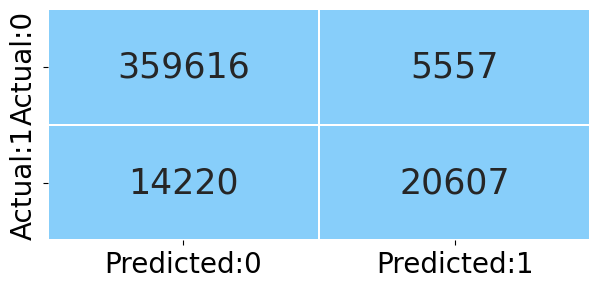

In [74]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plot_confusion_matrix(nb)
plt.rcParams["figure.figsize"]=[7,3]

In [75]:
kappa_value=kappa_score(nb)
print(kappa_value)

0.6495610192449339


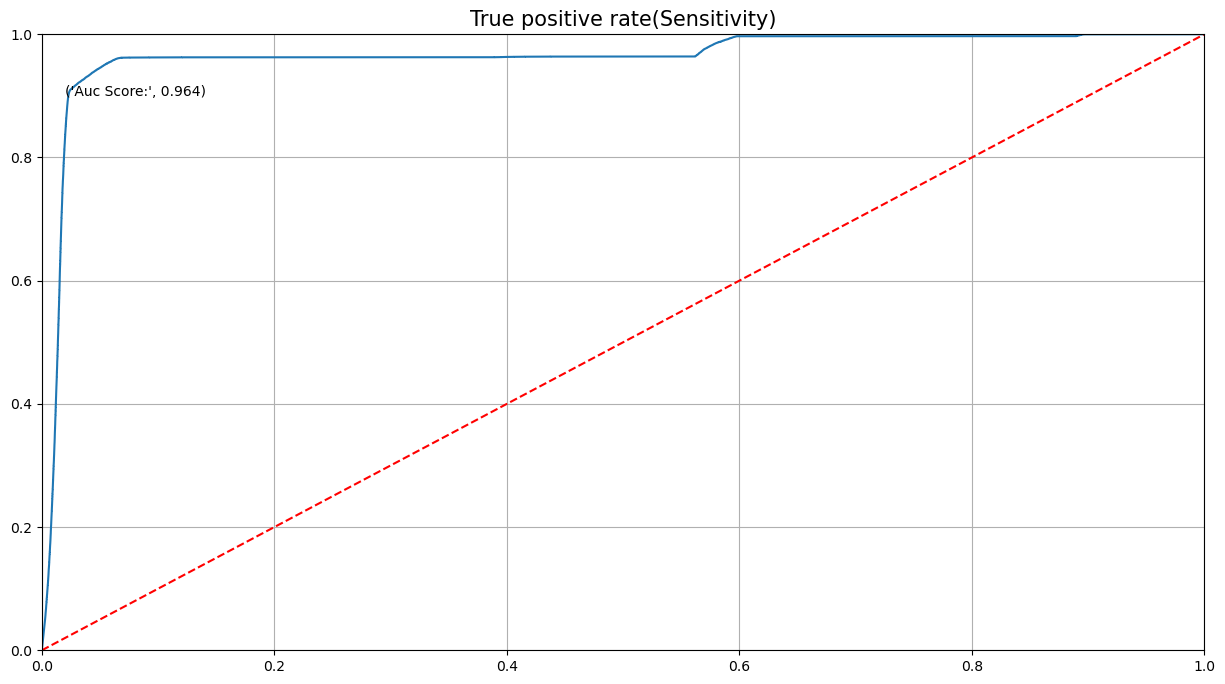

In [76]:
plt.figure(figsize=(15,8))
plot_roc(nb)

In [77]:
#Tabulate
update_score_card(model_name="GaussianNB")

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,Logistic Regression,0.966621,0.889904,0.607144,0.959255,0.700682,0.721820
1,Decision_tree_model,0.999912,0.999971,0.999828,0.999982,0.999890,0.999899
2,AdaBoostClassifier,0.999995,0.998221,0.999139,0.999770,0.998554,0.998680
3,GaussianNB,0.964009,0.787609,0.591696,0.950558,0.649561,0.675739


5.6 KNeighborsClassifier

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [79]:
y_pred = knn.predict(X_test)

In [80]:
y_pred_prob=knn.predict_proba(X_test)[:,1]
y_pred_prob

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
test_report=get_test_report(knn)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    365173
           1       0.88      0.92      0.90     34827

    accuracy                           0.98    400000
   macro avg       0.94      0.95      0.95    400000
weighted avg       0.98      0.98      0.98    400000



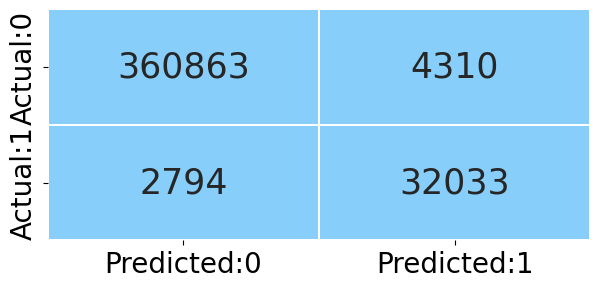

In [82]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plot_confusion_matrix(knn)
plt.rcParams["figure.figsize"]=[7,3]

In [83]:
kappa_value=kappa_score(knn)
print(kappa_value)

0.8904403865632093


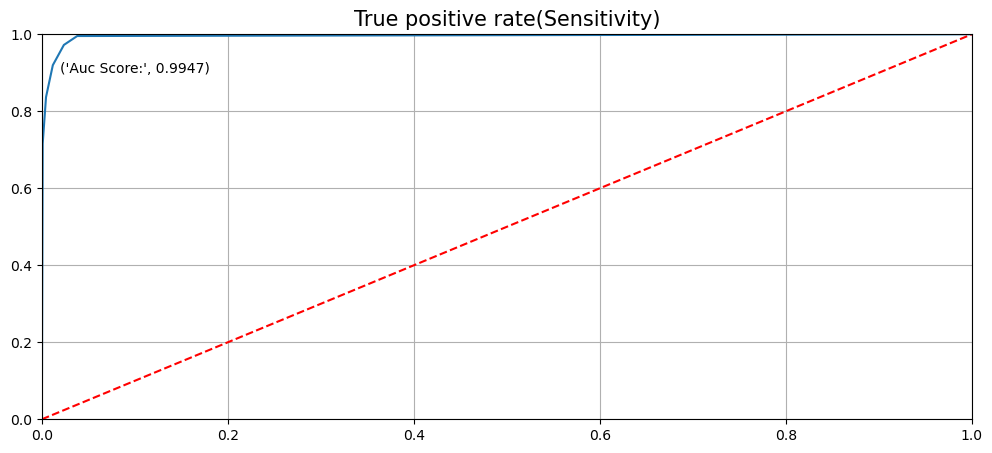

In [84]:
plt.figure(figsize=(12,5))
plot_roc(knn)

In [85]:
#Tabulate
update_score_card(model_name="KNeighborsClassifier")

,Model,AUC score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1 Score
0,Logistic Regression,0.966621,0.889904,0.607144,0.959255,0.700682,0.721820
1,Decision_tree_model,0.999912,0.999971,0.999828,0.999982,0.999890,0.999899
2,AdaBoostClassifier,0.999995,0.998221,0.999139,0.999770,0.998554,0.998680
3,GaussianNB,0.964009,0.787609,0.591696,0.950558,0.649561,0.675739
4,KNeighborsClassifier,0.994669,0.881408,0.919775,0.982240,0.890440,0.900183


The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using AUC score, precision, recall, accuracy, kappa score and f1-score.

The above table shows that the Decision Tree model has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree model  can be used to predict the existence of creditcard fraud prediction. In future when we have more fraud detection or bigger dataset and we can also apply Decision Tree model and AdaBoostClassifier and ensemble techniques for prediction that can be tested again.